In [0]:
pip install libauc torch

  Obtaining dependency information for libauc from https://files.pythonhosted.org/packages/e2/1b/0f89637169e8b56fbd3f873460a45549f30b48cf780c3b3d6b099db407ec/libauc-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/3f/a4/d2537f47fd7fcfba966bd806e3ec18e7ee1681056d4b0a9c8d983983e4d5/opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for torch-geometric from https://files.pythonhosted.org/packages/fc/14/569e932645bd0d91ba792287ce9a5a910b190d76295f28f4281f13633476/torch_geometric-2.6.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/63.1 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 30.7/63.1 kB 1.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 61.4/63.1 kB 967.4 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 600.1 kB/s eta 0:00:00
  Obtaining depende

In [0]:
from libauc.losses import CrossEntropyLoss

import torch
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import top_k_accuracy_score
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
import numpy as np

"""
    This script provides an example of how to learn a logistic regression model for a binary classification problem
    on the "breast-cancer" dataset using SGD optimizer with a constant learning rate. You are asked to complete the 
    code and explore different schedulers and compare them. 
    Please try the following 3 schedulers:
    step decay, cosine decay, polynomial decay. You should implement schedulers yourself.
"""

'\n    This script provides an example of how to learn a logistic regression model for a binary classification problem\n    on the "breast-cancer" dataset using SGD optimizer with a constant learning rate. You are asked to complete the \n    code and explore different schedulers and compare them. \n    Please try the following 3 schedulers:\n    step decay, cosine decay, polynomial decay. You should implement schedulers yourself.\n'

In [0]:
from sklearn.datasets import load_breast_cancer



# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
y = 2 * y - 1  # Convert labels to {-1, 1}

# Normalize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)



In [0]:
from libauc.losses import CrossEntropyLoss
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import top_k_accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Dataset Class
class LibSVMDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.targets[targets == 2] = 0  # convert 2 to 0 for breast-cancer dataset
        self.targets[targets == 4] = 1  # convert 4 to 1 for breast-cancer dataset

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        data = self.data[idx].astype(np.float32)
        target = self.targets[idx].astype(np.int64)
        return data, target

# A mini example of SGD optimizer
class SGD(torch.optim.Optimizer):
    def __init__(self, params, lr=0.1, weight_decay=0.0):
        self.lr = lr
        defaults = dict(lr=lr, weight_decay=weight_decay)
        super(SGD, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            weight_decay = group['weight_decay']
            self.lr = group['lr']
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad
                # L2 regularization (weight decay)
                if weight_decay != 0:
                    d_p = d_p.add(p, alpha=weight_decay)
                # Update model parameters
                p.data = p.data - self.lr * d_p

        return loss

# A simple linear model
class LinearModel(torch.nn.Module):
    def __init__(self, input_dim=10, output_dim=1):
        super().__init__()
        self.classifier = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.classifier(x)

# Learning rate schedulers
def step_decay_scheduler(lr, epoch, decay_rate=0.1, decay_epochs=15):
    if epoch % decay_epochs == 0:
        return lr * gamma ** (epoch // t0)
    return lr

def cosine_decay_scheduler(lr, epoch, total_epochs, min_lr=0.001):
    return min_lr + 0.5 * (lr - min_lr) * (1 + np.cos(np.pi * epoch / total_epochs))
  

def polynomial_decay_scheduler(lr, epoch, total_epochs, min_lr=0.001, power=0.5):
    return (lr) * (epoch) ** alpha
 

# Hyper Parameters
BATCH_SIZE = 16
total_epochs = 30
initial_lr_list  = [0.1, 0.3, 1, 3, 10]


min_lr = 0.001

gamma = 0.1
t0 = 15
alpha = 0.5

T = epochs  # total epochs

def main():
    # Load dataset
    X_train, y_train = X,y

    # Normalization
    scaler = StandardScaler()
    X_train = X_train
    X_train = scaler.fit_transform(X_train)

    # Dataset and DataLoader
    trainSet = LibSVMDataset(X_train, y_train)
    trainloader = DataLoader(trainSet, batch_size=BATCH_SIZE, shuffle=True)

    # Define model
    feat_dim = X_train.shape[-1]

    model = LinearModel(input_dim=feat_dim, output_dim=1)

    # Define loss and optimizer
    loss_fn = CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=initial_lr)

    print('Start Training')
    print('-' * 30)

    train_log = []
    for epoch in range(total_epochs):
        # Training loop
        train_loss = []
        model.train()
        for data, targets in trainloader:
            y_pred = model(data)
            loss = loss_fn(y_pred, targets.float().reshape(-1, 1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track training loss
            train_loss.append(loss.item())

            # Learning rate decay
            ### Update the learning rate per iteration (Choose one scheduler)
            # For step decay
            if decay_type=='step':
              optimizer.param_groups[0]['lr'] = step_decay_scheduler(optimizer.param_groups[0]['lr'], epoch)

            # For cosine decay
            if decay_type=='cosine':
              optimizer.param_groups[0]['lr'] = cosine_decay_scheduler(optimizer.param_groups[0]['lr'], epoch, total_epochs, min_lr=min_lr)

            # For polynomial decay
            if decay_type=='polynomial':
              optimizer.param_groups[0]['lr'] = polynomial_decay_scheduler(optimizer.param_groups[0]['lr'], epoch, total_epochs, min_lr=min_lr)

        # Evaluation
        model.eval()
        train_pred_list = []
        train_true_list = []
        for train_data, train_targets in trainloader:
            train_pred = model(train_data)
            train_pred_list.append(train_pred.detach().numpy())
            train_true_list.append(train_targets.numpy())

        train_true = np.concatenate(train_true_list)
        train_pred = np.concatenate(train_pred_list)
        train_acc = top_k_accuracy_score(train_true, train_pred, k=1)
        train_loss = np.mean(train_loss)

        # Print results
        print(f"Epoch: {epoch + 1}/{total_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, LR: {optimizer.param_groups[0]['lr']:.6f}")
        train_log.append(train_loss)
    return train_log,initial_lr

##Plot the Epoch vs Loss 
def plot_convergence(histories, labels, title):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history, label=label)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.show()

0.1
Start Training
------------------------------
Epoch: 1/30, Train Loss: -3.8729, Train Acc: 0.9420, LR: 0.100000
Epoch: 2/30, Train Loss: -11.0076, Train Acc: 0.9455, LR: 0.100000
Epoch: 3/30, Train Loss: -18.3068, Train Acc: 0.9455, LR: 0.100000
Epoch: 4/30, Train Loss: -25.4774, Train Acc: 0.9455, LR: 0.100000
Epoch: 5/30, Train Loss: -32.6641, Train Acc: 0.9455, LR: 0.100000
Epoch: 6/30, Train Loss: -39.9715, Train Acc: 0.9455, LR: 0.100000
Epoch: 7/30, Train Loss: -47.2605, Train Acc: 0.9455, LR: 0.100000
Epoch: 8/30, Train Loss: -53.7810, Train Acc: 0.9455, LR: 0.100000
Epoch: 9/30, Train Loss: -61.6572, Train Acc: 0.9455, LR: 0.100000
Epoch: 10/30, Train Loss: -68.3403, Train Acc: 0.9473, LR: 0.100000
Epoch: 11/30, Train Loss: -75.3473, Train Acc: 0.9455, LR: 0.100000
Epoch: 12/30, Train Loss: -82.9396, Train Acc: 0.9455, LR: 0.100000
Epoch: 13/30, Train Loss: -91.1638, Train Acc: 0.9455, LR: 0.100000
Epoch: 14/30, Train Loss: -97.3397, Train Acc: 0.9455, LR: 0.100000
Epoch: 1

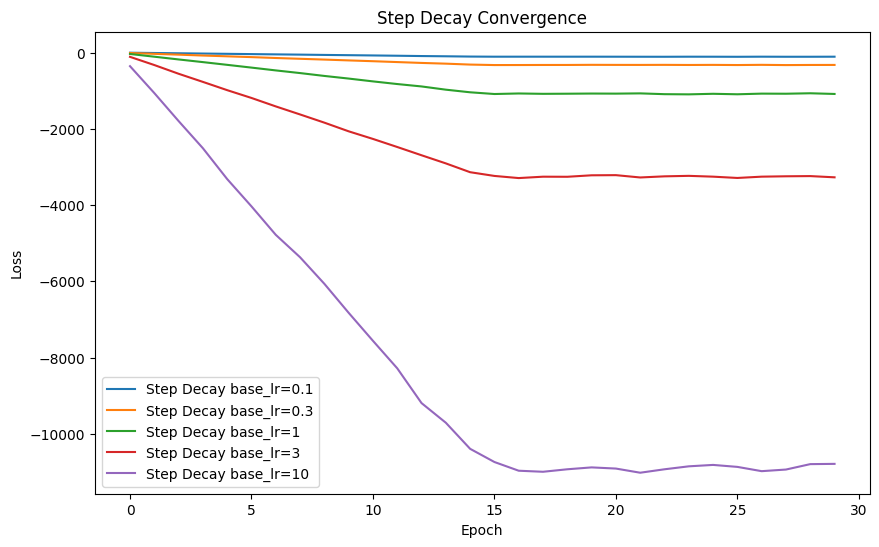

In [0]:
# Plot Step Decay Convergence Curves
histories_step = []
decay_type='step'
for initial_lr in initial_lr_list:
  print(initial_lr)
  train_log,initial_lr=main()
  histories_step.append(train_log)

plot_convergence(histories_step, labels=[f'Step Decay base_lr={lr}' for lr in initial_lr_list], title='Step Decay Convergence')

0.1
Start Training
------------------------------
Epoch: 1/30, Train Loss: -3.9102, Train Acc: 0.9438, LR: 0.100000
Epoch: 2/30, Train Loss: -11.0665, Train Acc: 0.9438, LR: 0.090692
Epoch: 3/30, Train Loss: -17.4273, Train Acc: 0.9455, LR: 0.061393
Epoch: 4/30, Train Loss: -21.6126, Train Acc: 0.9455, LR: 0.025753
Epoch: 5/30, Train Loss: -23.5338, Train Acc: 0.9473, LR: 0.006044
Epoch: 6/30, Train Loss: -23.8506, Train Acc: 0.9455, LR: 0.001416
Epoch: 7/30, Train Loss: -24.0734, Train Acc: 0.9455, LR: 0.001011
Epoch: 8/30, Train Loss: -24.3057, Train Acc: 0.9455, LR: 0.001000
Epoch: 9/30, Train Loss: -24.6045, Train Acc: 0.9455, LR: 0.001000
Epoch: 10/30, Train Loss: -24.3754, Train Acc: 0.9473, LR: 0.001000
Epoch: 11/30, Train Loss: -24.5836, Train Acc: 0.9473, LR: 0.001000
Epoch: 12/30, Train Loss: -24.6075, Train Acc: 0.9473, LR: 0.001000
Epoch: 13/30, Train Loss: -25.1726, Train Acc: 0.9473, LR: 0.001000
Epoch: 14/30, Train Loss: -24.7204, Train Acc: 0.9473, LR: 0.001000
Epoch: 1

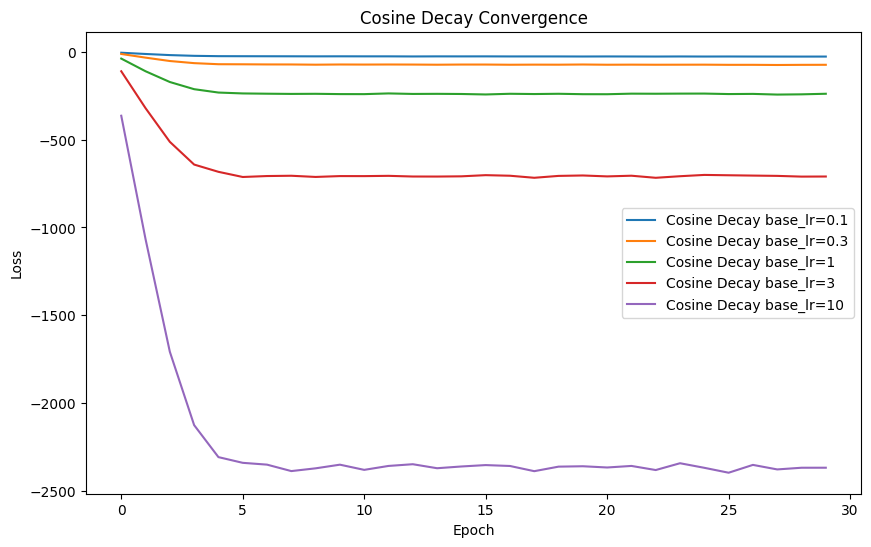

In [0]:
# Plot Step Decay Convergence Curves


histories_cosine = []
decay_type='cosine'
for initial_lr in initial_lr_list:
  print(initial_lr)
  train_log,initial_lr=main()
  histories_cosine.append(train_log)

plot_convergence(histories_cosine, labels=[f'Cosine Decay base_lr={lr}' for lr in initial_lr_list], title='Cosine Decay Convergence')

0.1
Start Training
------------------------------
Epoch: 1/30, Train Loss: -0.0590, Train Acc: 0.9121, LR: 0.000000
Epoch: 2/30, Train Loss: -0.0726, Train Acc: 0.9121, LR: 0.000000
Epoch: 3/30, Train Loss: -0.0788, Train Acc: 0.9121, LR: 0.000000
Epoch: 4/30, Train Loss: -0.0860, Train Acc: 0.9121, LR: 0.000000
Epoch: 5/30, Train Loss: -0.0772, Train Acc: 0.9121, LR: 0.000000
Epoch: 6/30, Train Loss: -0.0748, Train Acc: 0.9121, LR: 0.000000
Epoch: 7/30, Train Loss: -0.0770, Train Acc: 0.9121, LR: 0.000000
Epoch: 8/30, Train Loss: -0.0819, Train Acc: 0.9121, LR: 0.000000
Epoch: 9/30, Train Loss: -0.0777, Train Acc: 0.9121, LR: 0.000000
Epoch: 10/30, Train Loss: -0.0772, Train Acc: 0.9121, LR: 0.000000
Epoch: 11/30, Train Loss: -0.0802, Train Acc: 0.9121, LR: 0.000000
Epoch: 12/30, Train Loss: -0.0857, Train Acc: 0.9121, LR: 0.000000
Epoch: 13/30, Train Loss: -0.0845, Train Acc: 0.9121, LR: 0.000000
Epoch: 14/30, Train Loss: -0.0859, Train Acc: 0.9121, LR: 0.000000
Epoch: 15/30, Train L

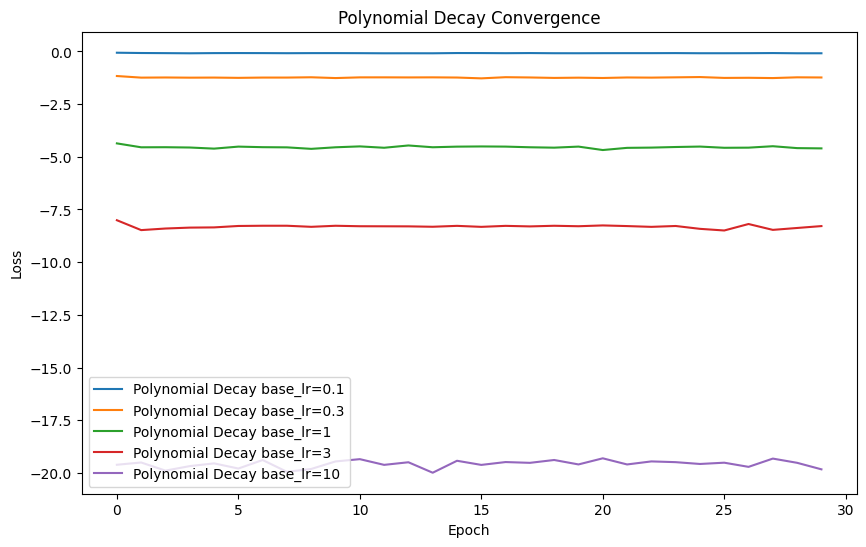

In [0]:
# Plot Step Decay Convergence Curves


histories_polynomial = []
decay_type='polynomial'
for initial_lr in initial_lr_list:
  print(initial_lr)
  train_log,initial_lr=main()
  histories_polynomial.append(train_log)

plot_convergence(histories_polynomial, labels=[f'Polynomial Decay base_lr={lr}' for lr in initial_lr_list], title='Polynomial Decay Convergence')

In [0]:
# plot_convergence(histories_step, labels=['step_lr_10','cosine_lr_10','polynomial_lr_10'], title='Convergence')

best_convergence=[]
step_best=histories_step[4]
best_convergence.append(step_best)

step_cosine=histories_cosine[4]
best_convergence.append(step_cosine)



step_polynomial=histories_polynomial[4]
best_convergence.append(step_polynomial)


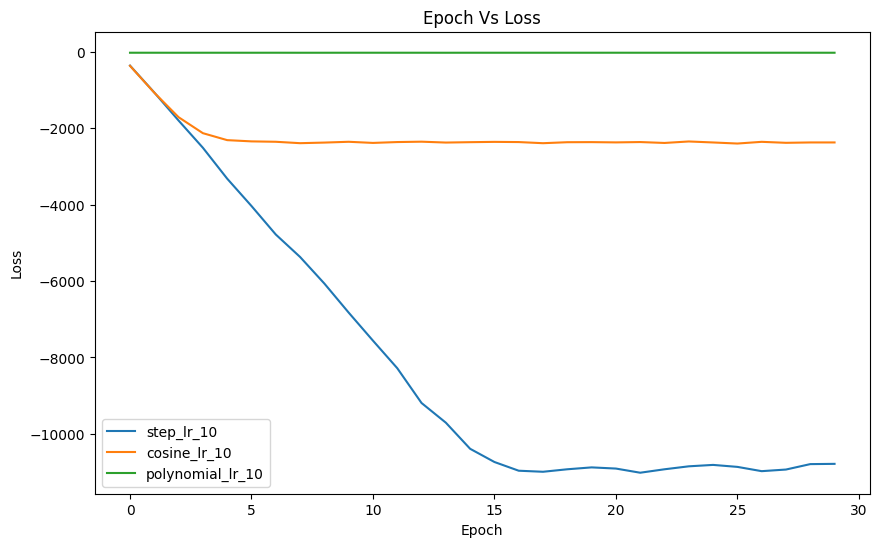

In [0]:
plot_convergence(best_convergence, labels=['step_lr_10','cosine_lr_10','polynomial_lr_10'], title='Epoch Vs Loss')